In [65]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cf
import netCDF4
import pandas as pd
import datetime
import pytz 
from tzwhere import tzwhere
import math
from suntime import Sun
import scipy as sci
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import cdo
import statsmodels.api as sm

In [68]:
extpar1 = xr.open_dataset( '../icon_extpar_0024_R02B06_G_20200917_tiles.nc', chunks={} )
grid1 = xr.open_dataset('../fc_DOM01_0121_mem001_NU_grid.nc')

In [69]:
# read center lon/lat in radiant
clon_rad = grid1['clon']                # center longitude  / rad
clat_rad = grid1['clat']                # center latitutde  / rad

# convert to degrees
clon = np.rad2deg( clon_rad )
clat = np.rad2deg( clat_rad )

# read surface height
h    = extpar1['topography_c']      # topography height / m

In [ ]:
# Set the limits for Europe
lon_min, lon_max = -10, 40  # Longitude range for Europe
lat_min, lat_max = 30, 50   # Latitude range for Europe

# Filter data within the specified limits
mask = (clon.values >= lon_min) & (clon.values <= lon_max) & (clat.values >= lat_min) & (clat.values <= lat_max)
clon_europe = clon.values[mask]
clat_europe = clat.values[mask]
h_europe = h[mask]

# Plot the data for Europe
plt.figure(figsize=(10, 10))
plt.tricontourf(clon_europe, clat_europe, h_europe, levels=20, cmap=plt.cm.gist_earth, vmin=-800, vmax=1200.)

# Set the limits for the plot
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

plt.title('ICON DOM01 - Europe', fontweight='bold')
plt.show()


In [14]:
clon.values

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [10]:
clon_rad = topo['clon']                # center longitude  / rad
clat_rad = topo['clat']                # center latitutde  / rad

# convert to degrees
clon = np.rad2deg( clon_rad )
clat = np.rad2deg( clat_rad )

# read surface height
h    = topo['topography_c']  

ValueError: x and y arrays must consist of at least 3 unique points

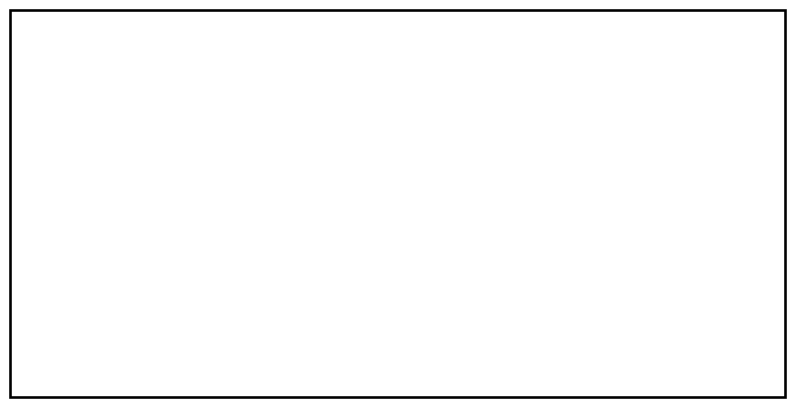

In [12]:
plt.figure( figsize = (10,10))

# this is our map projection
ax = plt.axes(projection = ccrs.PlateCarree())

plt.tricontourf( clon, clat, h, levels = 20, cmap = plt.cm.gist_earth, vmin = -800, vmax = 1200.)

# and here we draw country borders
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth = 2)


plt.title( 'ICON DOM01', fontweight = 'bold');